In [1]:
# Libraries for reading and managing the dataset
import pandas as pd
import numpy as np

# Libraries for visualization and data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Libraries for clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score

# Other support libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm   # Libreries for matplotlib's color mapping

In [2]:
df = pd.read_excel('olivedata.xlsx')
df

,CATEGORY,palmitic,palmitoleic,stearic,oleic,linoleic,eicosanoic,linolenic
0,1,1075,75,226,7823,672,36,60
1,1,1088,73,224,7709,781,31,61
2,1,911,54,246,8113,549,31,63
3,1,966,57,240,7952,619,50,78
4,1,1051,67,259,7771,672,50,80
...,...,...,...,...,...,...,...,...
567,8,1280,110,290,7490,790,10,10
568,8,1060,100,270,7740,810,10,10
569,8,1010,90,210,7720,970,0,0
570,8,990,120,250,7750,870,10,10


- **Samples / Variables:** 572 / 8  
- **Category**: 1 to 8 
- **Fatty acids:** Palmitic, Palmitoleic, Stearic, Oleic, Linoleic, Eicosanoic, Linolenic

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CATEGORY       572 non-null    int64
 1   palmitic       572 non-null    int64
 2   palmitoleic    572 non-null    int64
 3   stearic        572 non-null    int64
 4   oleic          572 non-null    int64
 5   linoleic       572 non-null    int64
 6   eicosanoic     572 non-null    int64
 7   linolenic      572 non-null    int64
dtypes: int64(8)
memory usage: 35.9 KB


- **Rows / Columns:** 572 / 8  
- **Types:** all integers
- **Missing values:** None  

**Note:** Data types are consistent and no missing values detected

In [4]:
df.describe()

,CATEGORY,palmitic,palmitoleic,stearic,oleic,linoleic,eicosanoic,linolenic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,4.599650,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902
std,2.356687,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250
min,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000
25%,3.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000
50%,3.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000
75%,7.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000
max,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000


Using df.describe(), I get a quick statistical overview of the numerical columns, including count, mean, standard deviation, min, max and quartiles.  

Relevant informations from the summary:  
- **Oleic acid** shows the highest mean and variability, suggesting it plays a key role in differentiating samples.  
- **Eicosanoic** and **linolenic acids** recorded the lowest absolute values.  
- **Oleic acid** also reached the highest absolute value among all fatty acids.  

**Key Insight:** Oleic acid appears particularly important for distinguishing patterns in the dataset.

In [5]:
df['CATEGORY'].value_counts()

CATEGORY
3    206
5     65
2     56
9     51
8     50
7     50
4     36
6     33
1     25
Name: count, dtype: int64

The dataset shows a clear imbalance: more than 200 olive oil samples for the the class 3. On the contrary, the category 1 is particularly underrepresented, with just 25 observations.  

This uneven distribution means that analyses will naturally be biased toward the class 3, making patterns from smaller groups harder to detect.

In [6]:
dfSenzaCategoria = df.drop(columns='CATEGORY', axis=1)  # Separation of the features from the target variable
dfSenzaCategoria

,palmitic,palmitoleic,stearic,oleic,linoleic,eicosanoic,linolenic
0,1075,75,226,7823,672,36,60
1,1088,73,224,7709,781,31,61
2,911,54,246,8113,549,31,63
3,966,57,240,7952,619,50,78
4,1051,67,259,7771,672,50,80
...,...,...,...,...,...,...,...
567,1280,110,290,7490,790,10,10
568,1060,100,270,7740,810,10,10
569,1010,90,210,7720,970,0,0
570,990,120,250,7750,870,10,10


In [7]:
# dimensionality reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(dfSenzaCategoria)

# Clearer and more interpretable visualization
reduced_data = pd.DataFrame(reduced_data)
reduced_data.insert(loc=2, column='CATEGORY', value=df['CATEGORY'])
reduced_data

,0,1,CATEGORY
0,618.068619,-38.302434,1
1,469.708097,15.596079,1
2,966.249645,25.758213,1
3,782.973264,14.510974,1
4,581.822963,-32.167923,1
...,...,...,...
567,224.674331,-140.580227,8
568,489.652318,58.244719,8
569,415.874179,208.074016,8
570,489.071631,147.652165,8


In a multiclass clustering problem, the dataset does not have a true target column. However, an attribute specifying the category of each sample can be used as a reference. While it is not a real target, it helps evaluate how well the resulting clusters match the actual categories, offering insight into the validity of the clustering process, even though clustering itself remains unsupervised.  

As a first step in exploring this dataset, before applying clustering methods, we project the data onto the first two **principal components (PCA)**. This provides a general view of the data structure and helps us understand how the samples are distributed across the feature space.

Text(0, 0.5, 'Second component')

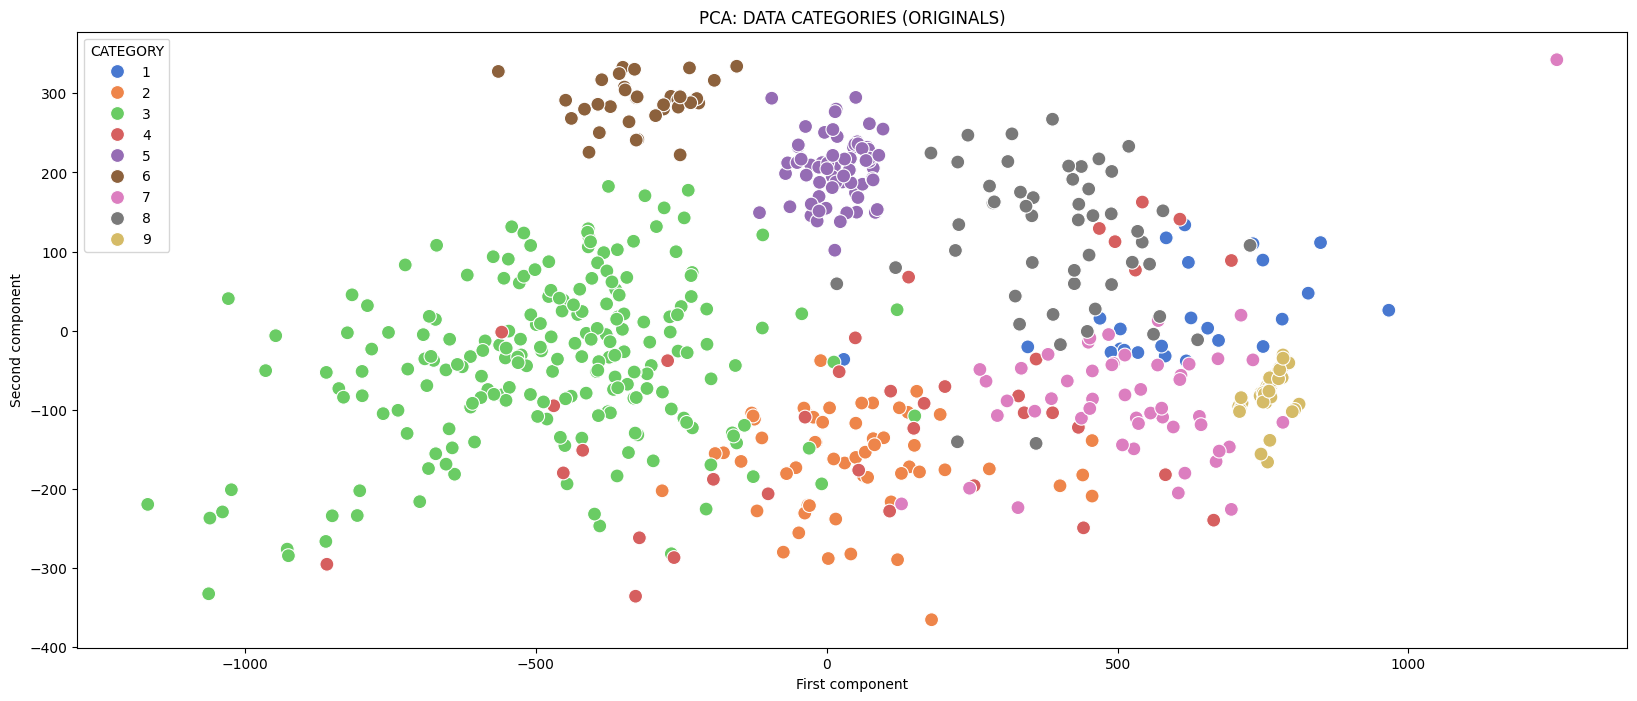

In [8]:
# I visualise the classes as they are with PCA
plt.figure(figsize=(20, 8))
sns.scatterplot(x=reduced_data.iloc[:, 0], y=reduced_data.iloc[:, 1], hue=reduced_data['CATEGORY'], palette='muted',
                s=100)   # Sets a fixed size for all points. The difference with the "size" parameter is that the latter changes the size of each point based on its values

plt.title("PCA: DATA CATEGORIES (ORIGINALS)")
plt.xlabel("First component")
plt.ylabel("Second component")

The data, even after applying Principal Component Analysis, appear to be **heavily overlapping**, which makes it challenging to clearly separate them into groups.  

This might introduce obstacles for clustering methods such as **K-Means**, which tends to create spherical or radial clusters. When data instead show irregular shapes or variable densities, as suggested by the plot, K-Means may struggle to capture the true structure, often producing clusters that are not meaningful.  

**Hierarchical clustering** is generally more flexible in handling cluster shapes. However, because it relies on distances between points (or cluster centroids), it too can face difficulties when data are strongly overlapped or very dense.  

Despite these challenges, I chose to proceed with **hierarchical clustering**, using the *average linkage* method with the **Minkowski metric**, as it has shown promising results in similar contexts.

**HIERARCHICAL CLUSTERING**

Hierarchical clustering is a data analysis technique used to group similar objects into clusters, organized in a **tree-like structure** called a **dendrogram**. hierarchical clustering builds a **hierarchy of clusters** that can be explored at different levels of detail.  

There are two main approaches:  

- **Agglomerative (bottom-up)**: start with each point as its own cluster, then iteratively merge the two most similar clusters until all points belong to a single cluster.  
- **Divisive (top-down)**: start with all points in one cluster, then iteratively split clusters into two more distinct sub-clusters until single points or the desired level of detail is reached.  

**Key features:**  
- No need to predefine the number of clusters (key parameter in K-means)
- Produces a dendrogram showing similarity between clusters, useful for deciding the optimal number of groups  
- Cluster distance can be defined in various ways: minimum, maximum, average, or centroid distance

In [9]:
# In the following cell, confusion arises because the column names are of integer type (0, 1), so I convert them to string
reduced_data.columns = reduced_data.columns.astype(str)

In [10]:
# Dictionary to save the results
risultati = []

metodi = ['complete', 'average', 'single']
metricheDistanza = ['euclidean', 'cityblock', 'chebyshev', 'minkowski', 'correlation', 'cosine']

for met in metodi:
    for dist in metricheDistanza:
        for c in range(2, 7):
            # Clustering with AgglomerativeClustering
            clustering = AgglomerativeClustering(n_clusters=c, linkage=met, metric=dist)
            clusterPred = clustering.fit_predict(reduced_data)
            # Save the result in the dictionary created above
            risultati.append({
                'Metodo': met,
                'Metrica di distanza': dist,
                'Numero di cluster': c,
                'Score': silhouette_score(reduced_data, clusterPred)
                })

risultati = pd.DataFrame(risultati)
risultati

,Metodo,Metrica di distanza,Numero di cluster,Score
0,complete,euclidean,2,0.542575
1,complete,euclidean,3,0.426644
2,complete,euclidean,4,0.349954
3,complete,euclidean,5,0.343875
4,complete,euclidean,6,0.449363
...,...,...,...,...
85,single,cosine,2,0.535220
86,single,cosine,3,0.241096
87,single,cosine,4,0.331548
88,single,cosine,5,0.230938


In [11]:
# Best scores (ordered)
risultati['Score'].sort_values(ascending=False)

0     0.542575
15    0.542575
45    0.538805
30    0.538805
40    0.535623
        ...   
64   -0.181400
79   -0.181400
74   -0.181400
73   -0.189769
69   -0.318337
Name: Score, Length: 90, dtype: float64

In [12]:
risultati[risultati['Score']>=0.45]

,Metodo,Metrica di distanza,Numero di cluster,Score
0,complete,euclidean,2,0.542575
5,complete,cityblock,2,0.508755
6,complete,cityblock,3,0.452410
10,complete,chebyshev,2,0.501335
15,complete,minkowski,2,0.542575
25,complete,cosine,2,0.509374
30,average,euclidean,2,0.538805
31,average,euclidean,3,0.517322
32,average,euclidean,4,0.461894
35,average,cityblock,2,0.464937


**DISTANCE METRICS**

**Distance metrics** measure how similar or different two points are in a dataset. A general choice is the **Minkowski metric**, defined for points $x = (x_1,...,x_n)$ and $y = (y_1,...,y_n)$ as:

$$
d(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p\right)^{1/p}
$$

- $p = 1$ → Manhattan distance  
- $p = 2$ → Euclidean distance  
- $p \rightarrow \inf$ → Chebyshev distance  

This metric calculates dissimilarity between individual points, independent of clustering.

---
**DISTANCE LINKAGE**

**Linkage** defines how to compute the distance between clusters based on point-to-point distances. Common types include:

- **Single linkage:** minimum distance between points of two clusters  
- **Complete linkage:** maximum distance between points of two clusters  
- **Average linkage:** mean distance between all points in the clusters  

For average linkage, the distance between clusters A and B is:

$$
D(A,B) = \frac{1}{|A||B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
$$

where $d(x, y)$ is the chosen metric.

---

**Key points:**  
- Metrics define distances between points.  
- Linkage aggregates these distances to define inter-cluster distances. 
- **Average linkage** tends to produce balanced clusters.  
- **Minkowski metric** is flexible, allowing sensitivity adjustment across dimensions.  

This combination provides **robust and interpretable clusters**, while keeping flexibility in metric and aggregation choice.

Text(0, 0.5, 'Distance')

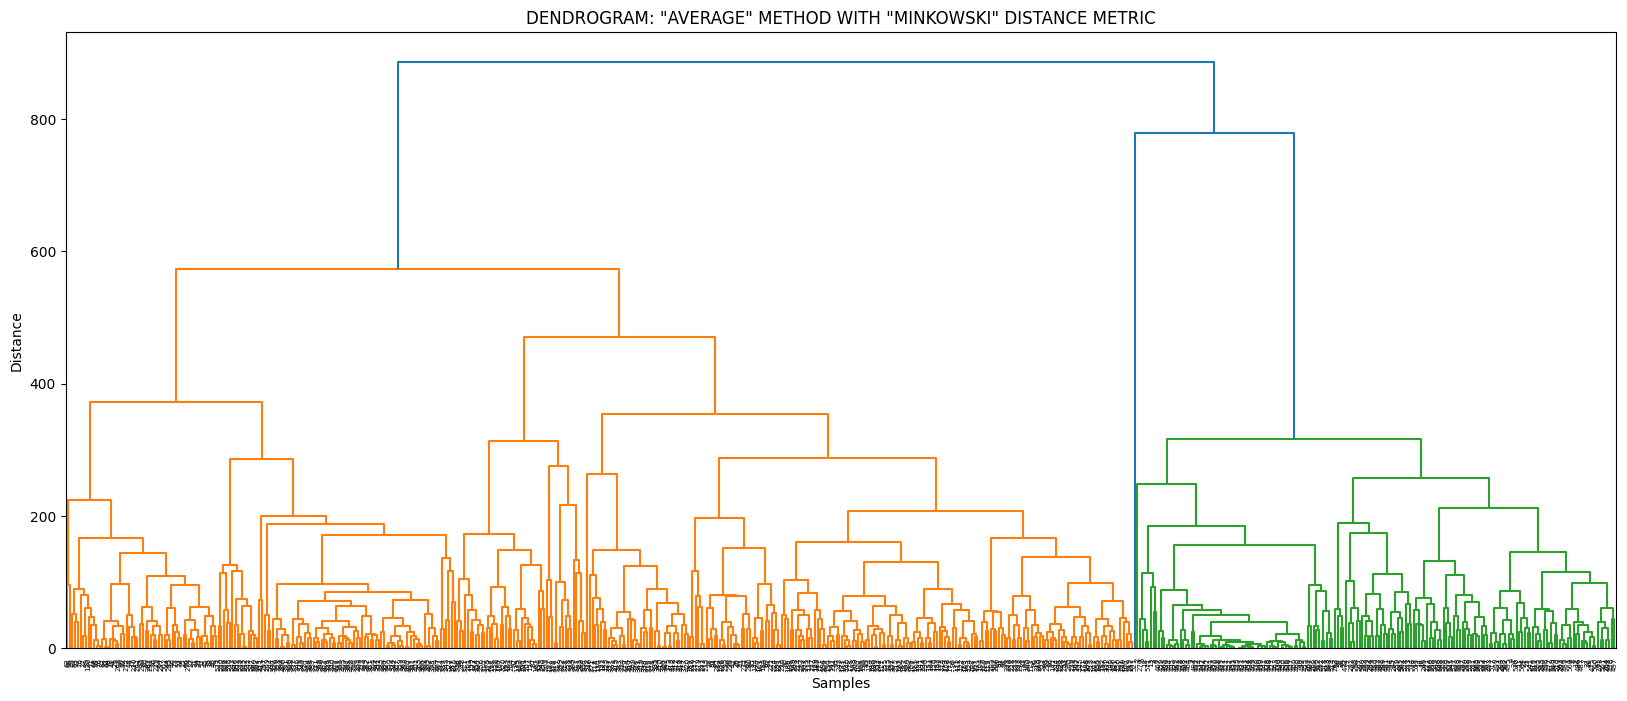

In [13]:
# Linkage matrix calculation
linkage_matrix = linkage(reduced_data, method='average', metric='minkowski')

# Dendrogram creation
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix)
plt.title('DENDROGRAM: "AVERAGE" METHOD WITH "MINKOWSKI" DISTANCE METRIC')
plt.xlabel("Samples")
plt.ylabel("Distance")

This figure shows a dendrogram built with **agglomerative hierarchical clustering**, using the *average linkage* method and the Minkowski distance metric.  

On the **vertical axis**, we read the distance at which clusters are merged: higher values mean more distinct groups. The **horizontal axis** lists the individual observations, shown as the leaves of the dendrogram. Horizontal lines mark the merging points of clusters, while colored vertical lines highlight potential clusters at different thresholds.  

A clear **main split** emerges between distances 600 and 800, producing two macro-clusters:  
- **Orange cluster (left):** internally very homogeneous, with several sub-clusters forming at relatively low distances.  
- **Green cluster (right):** merges later, suggesting stronger cohesion among its observations.  
- **Additional small group:** a minor third cluster forms a distinct group, which will be examined later.  

This structure suggests a **significant dissimilarity** between the two main clusters. Even at higher thresholds, the orange and green groups remain distinct, reflecting a structural divergence within the dataset.  

As we move down the hierarchy:  
- Below distance **200**, finer sub-clusters appear, offering a more granular view.  
- Some **outliers** are visible, merging only at very high distances (~800), behaving like isolated branches that join “late” in the clustering process.  

By adjusting distance thresholds (e.g., 600, 500, 400), we can explore alternative cluster configurations and examine both major divisions and subtle relationships within the data.

**SILHOUETTE SCORE**

The **Silhouette Score** is a metric used in **clustering** to evaluate how well each point fits within its cluster compared to other clusters. It measures both **internal consistency** within a cluster and **separation** between clusters.  

For an individual point $i$, the score is defined as:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:  
- $a(i)$ = average distance between the point and all other points **in the same cluster** (how close it is to its own cluster)  
- $b(i)$ = average distance between the point and all points in the **nearest different cluster** (how far it is from other clusters)  

The score ranges from **-1 to 1**:  
- $s(i) \approx 1$ → the point is well-matched to its cluster  
- $s(i) \approx 0$ → the point lies near a cluster boundary  
- $s(i) < 0$ → the point may be assigned to the wrong cluster  

The **overall Silhouette Score** for the clustering is the mean of all individual scores:

$$
S = \frac{1}{n} \sum_{i=1}^n s(i)
$$

Higher values indicate more coherent and well-separated clusters.  

**Practical Use:**  
- Compare different numbers of clusters (e.g., in k-means) and choose the value of $k$ with the highest score  
- Assess clustering quality: check if clusters are dense, well-separated or if points are misassigned

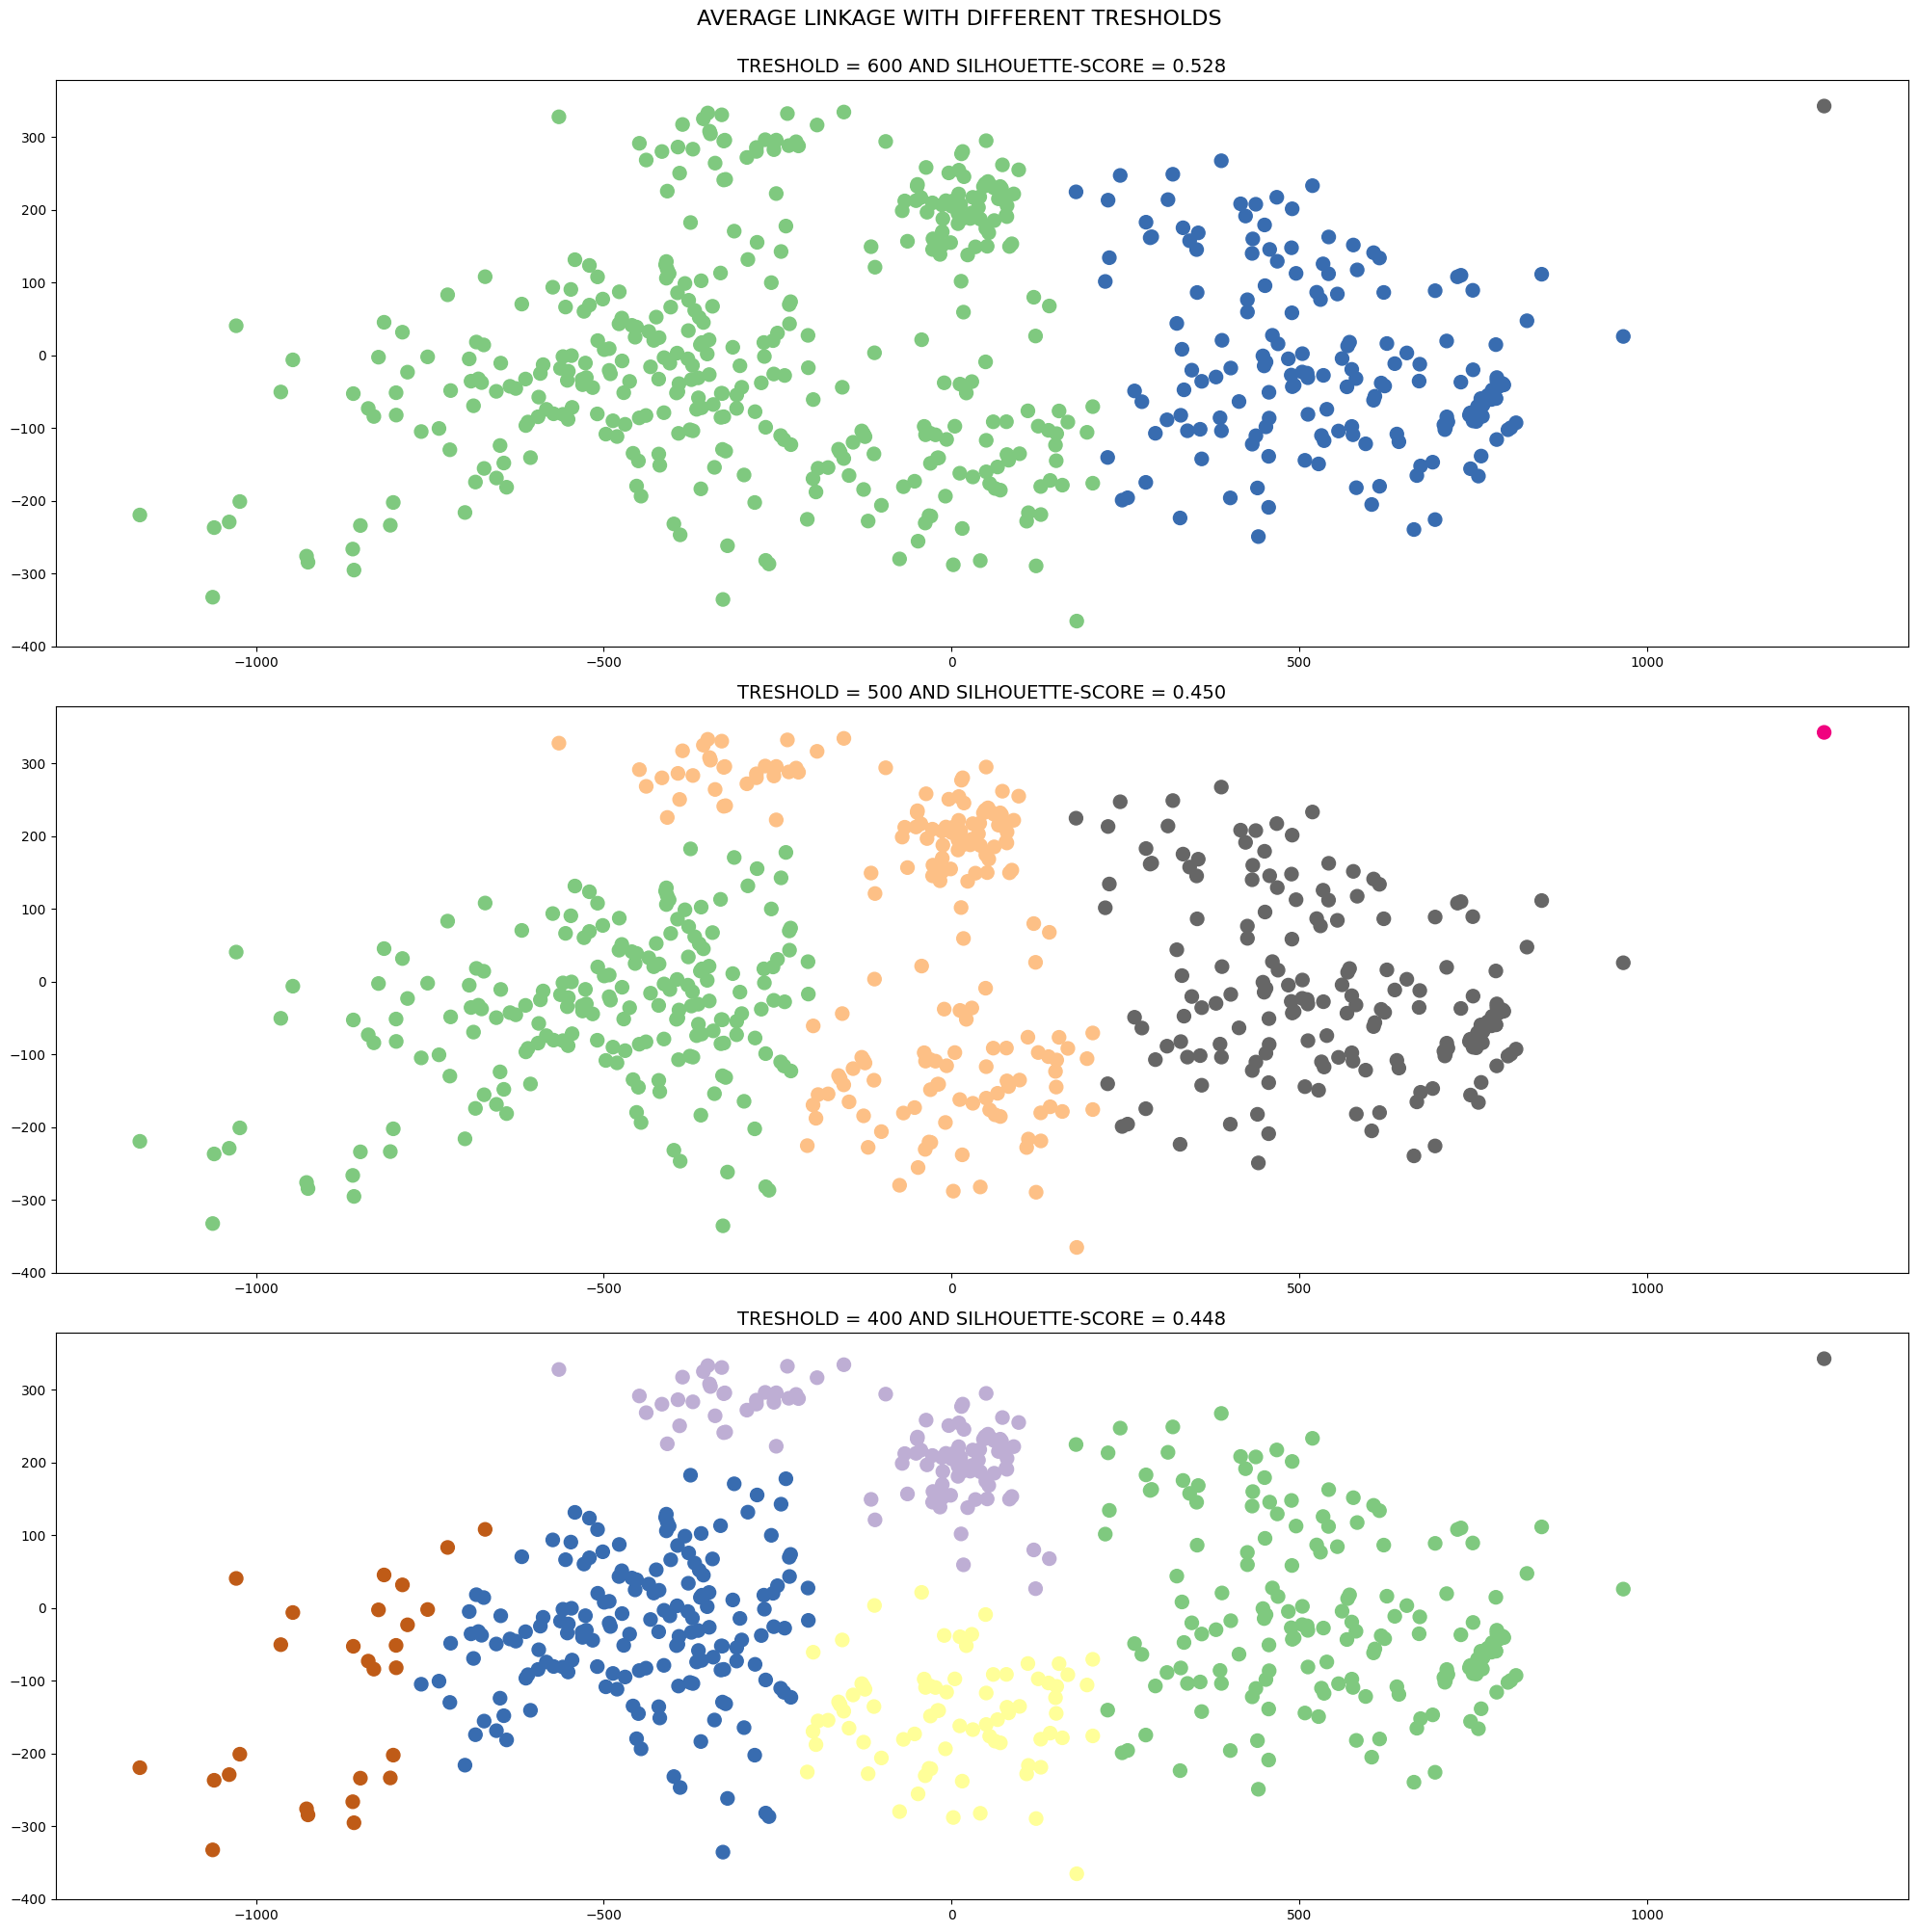

In [14]:
tresholds = [600, 500, 400]

plt.figure(figsize=(20, 20))

# Clustering with AgglomerativeClustering
for i in range(1, 4):
    plt.subplot(3, 1, i)
    clustering = AgglomerativeClustering(n_clusters=None, linkage='average', metric='minkowski', distance_threshold=tresholds[i-1])
    clusterPred = clustering.fit_predict(dfSenzaCategoria)

    plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=clusterPred, cmap=plt.get_cmap('Accent'), s=100)
    score = silhouette_score(reduced_data, clusterPred)
    plt.title(f"TRESHOLD = {tresholds[i-1]} AND SILHOUETTE-SCORE = {score:.3f}", fontsize=14)


plt.suptitle("AVERAGE LINKAGE WITH DIFFERENT TRESHOLDS", fontsize=16, y=1)    # General title
plt.tight_layout()

This figure shows the results of a **hierarchical clustering analysis** with three distance thresholds.  
Clusters are evaluated using the **silhouette score**, which measures both internal cohesion and separation between groups.  

---

#### Threshold = 600
At this level, two main clusters emerge (green and blue), plus a single-point cluster (grey), likely an outlier.  
- The green cluster (left) groups together categories 2–6, reflecting shared intrinsic features.  
- The blue cluster (right) contains the remaining categories.  
- The isolated point likely belongs to category 7, reinforcing its role as an outlier.  

With a silhouette score of **0.528**, this is the best-performing solution: clear separation, strong cohesion and a good trade-off between simplicity and accuracy.

---

#### Threshold = 500
Here, clusters split into four groups (green, orange, grey, pink). The outlier becomes more evident (pink).  
- Silhouette score drops to **0.448**, showing weaker cluster quality.  
- However, clusters start to align more closely with the true categories.  
- The green cluster is nearly “pure,” while the central one mixes categories 2, 4, 5 and 6.  
- On the right, the grey cluster remains stable, reflecting strong internal similarity.  

This threshold offers finer granularity but at the cost of overall quality.

---

#### Threshold = 400
Clusters further fragment into six groups (green, blue, yellow, purple, brown, grey).  
- The outlier again forms its own cluster.  
- Silhouette score remains **0.448**, confirming lower quality due to fragmentation.  
- Some separations add useful detail (in the central area), while others seem unnecessary (splitting on the left).  
- The rightmost cluster stays compact and indivisible, confirming its homogeneity.  

---

### Summary
- **Threshold 600:** Best for identifying robust macro-patterns;
- **Threshold 500 or 400:** Provide more detail and better alignment with real categories, but at the expense of cluster quality.

In short, higher thresholds give stronger, more cohesive clusters, while lower thresholds offer granularity but introduce noise and weaker silhouette scores.

Text(0, 0.5, 'Distance')

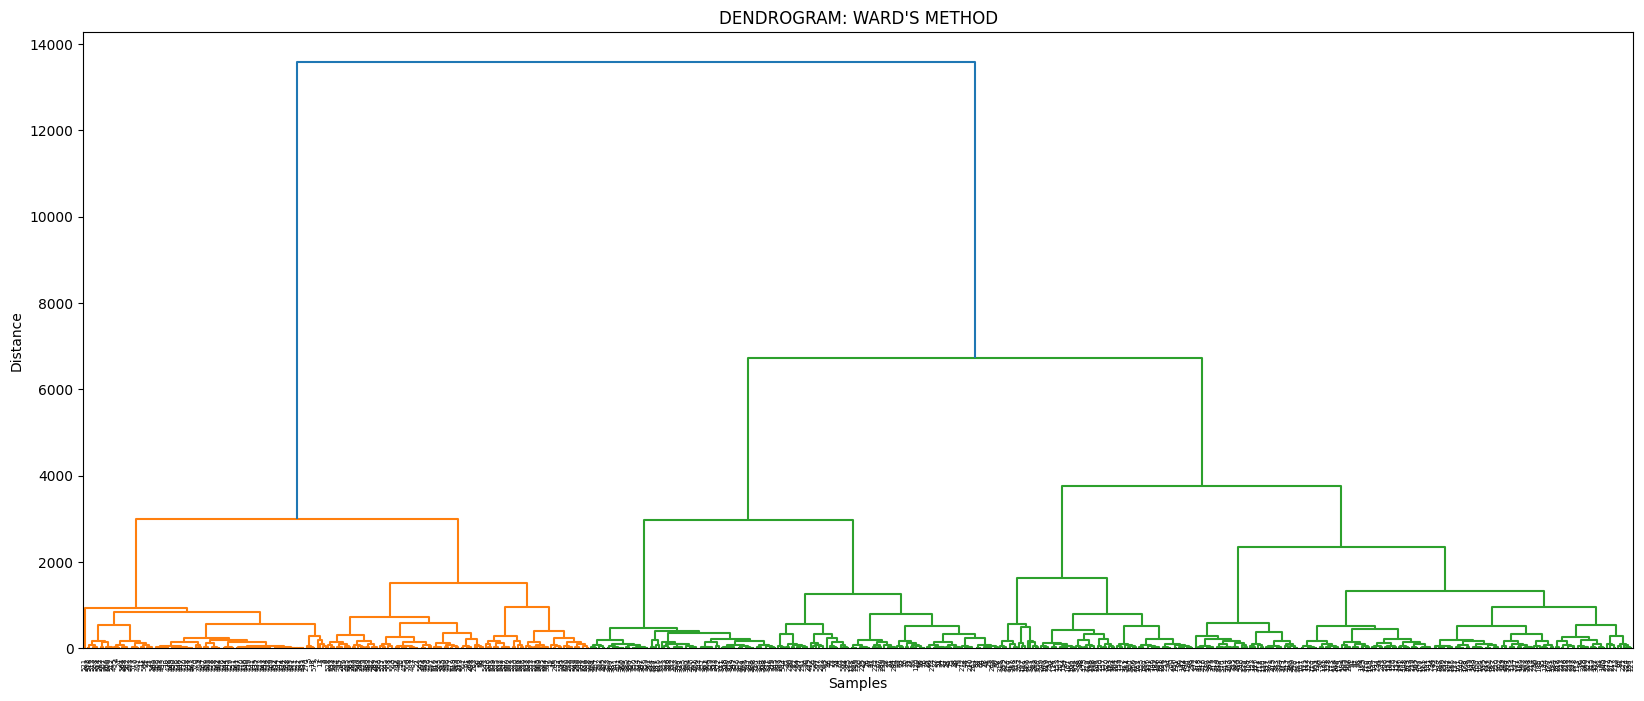

In [15]:
# Linkage matrix calculation with Ward's method
linkage_matrix = linkage(reduced_data, method='ward')

# Dendrogram creation
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix)
plt.title("DENDROGRAM: WARD'S METHOD")
plt.xlabel("Samples")
plt.ylabel("Distance")

This dendrogram was built using **Ward’s method**, which minimizes within-cluster variance and tends to produce more balanced groups.  

We observe two main macro-clusters that split at large distances (up to ~13,500), indicating strong dissimilarity between them.  
- The **orange cluster** (left) shows moderate internal cohesion, with sub-clusters merging around ~3,000. This suggests groups of very similar observations.  
- The **green cluster** (right) includes more observations, with merges happening more gradually and at higher distances, reflecting greater internal variability.  

Compared to the **average linkage** method, Ward’s approach yields a more uniform structure, with clusters appearing compact and balanced. Below the ~2,000 threshold, finer subdivisions emerge, though no clear outliers are visible.  

**Key distances:** thresholds around **8,000**, **4,000**, and **3,000** may serve as useful cut-offs for generating alternative cluster configurations.

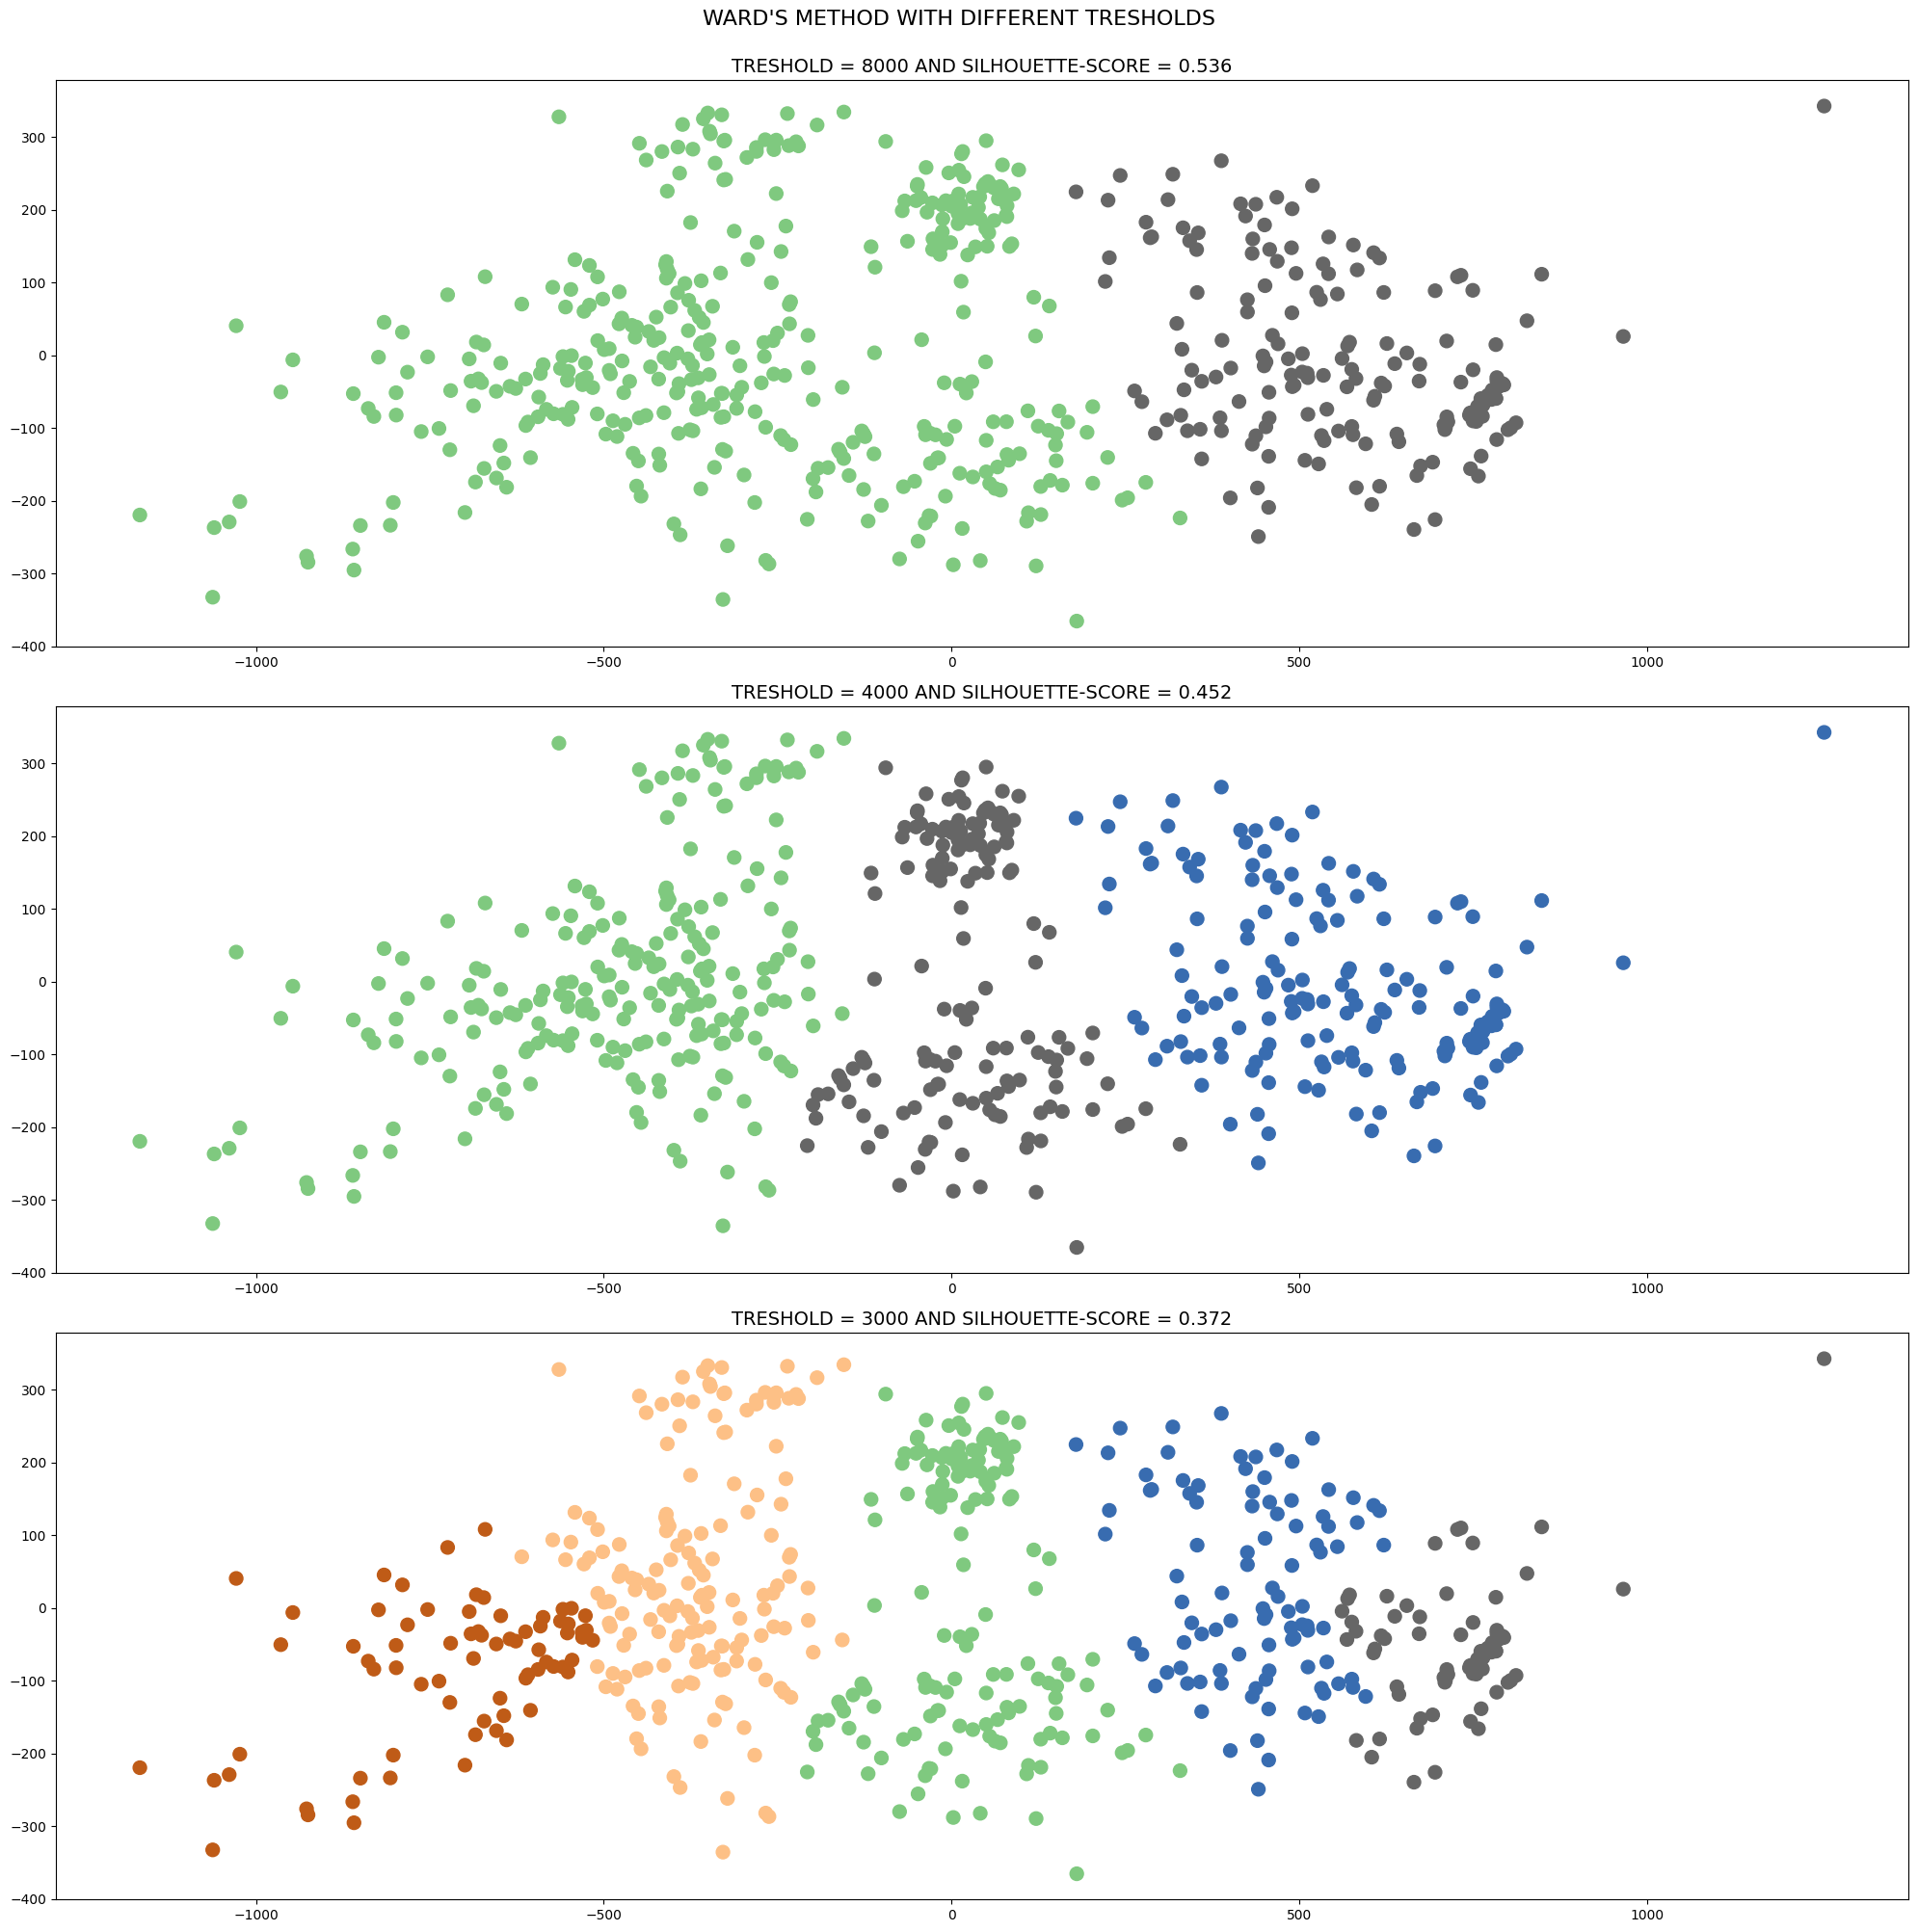

In [16]:
tresholds = [8000, 4000, 3000]

plt.figure(figsize=(20, 20))

# Clustering with AgglomerativeClustering
for i in range(1, 4):
    plt.subplot(3, 1, i)
    clustering = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=tresholds[i-1])
    clusterPred = clustering.fit_predict(reduced_data)

    plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=clusterPred, cmap=plt.get_cmap('Accent'), s=100)
    score = silhouette_score(dfSenzaCategoria, clusterPred)
    plt.title(f"TRESHOLD = {tresholds[i-1]} AND SILHOUETTE-SCORE = {score:.3f}", fontsize=14)

plt.suptitle("WARD'S METHOD WITH DIFFERENT TRESHOLDS", fontsize=16, y=1)
plt.tight_layout()

Using Ward’s method, I tested different thresholds to see how clustering quality and interpretability change.  

At the highest threshold (**8000**), the algorithm produces a small number of macro-clusters, similar to the previous method but with slightly better separation (silhouette score = 0.536). Even the isolated point in the top-right corner is now correctly assigned.  

With a medium threshold (**4000**), the data split into three clusters. The main difference is that the sixth category shifts from the central cluster to the left one. The silhouette score (0.452) is lower, reflecting more fragmentation, but the division is closer to the real distribution of points.  

At the lowest threshold (**3000**), the model creates five clusters. While this reveals more internal structure, such as the separation of categories 7, 8, and 9—it also reduces overall quality (silhouette score = 0.372). Excessive fragmentation makes the clustering less clear and harder to interpret.  

**In summary**  
- High thresholds (8000) capture the main structure effectively.  
- Medium thresholds (4000) offer a reasonable trade-off between detail and quality.  
- Low thresholds (3000) provide finer segmentation, but risk over-segmentation and loss of clarity.  

Overall, the best balance is achieved at higher thresholds, with the added benefit that this method handles outliers more robustly than the previous one.

Text(0, 0.5, 'Distance')

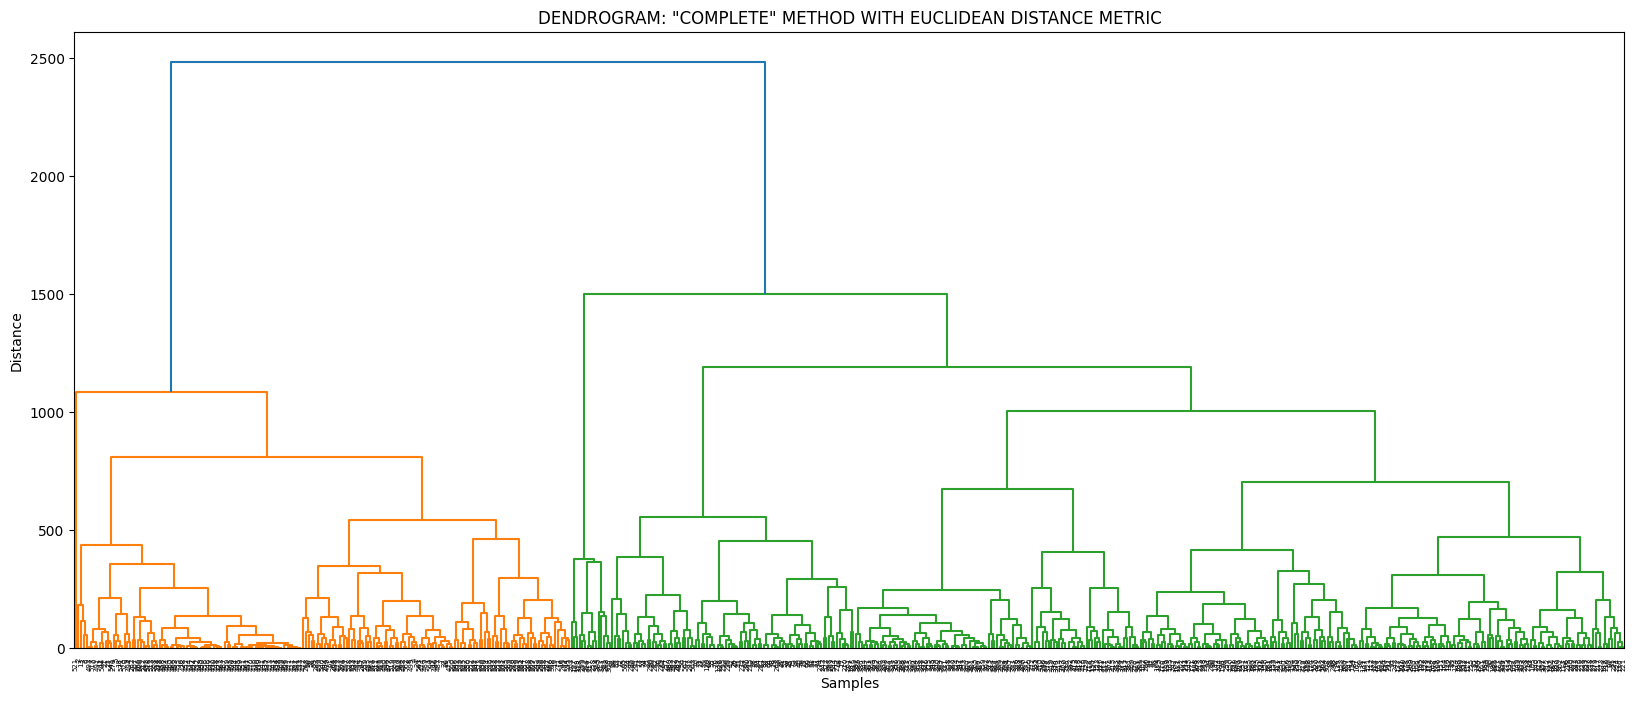

In [17]:
# Linkage matrix calculation
linkage_matrix = linkage(reduced_data, method='complete', metric='euclidean')

# Dendrogram creation
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix)
plt.title('DENDROGRAM: "COMPLETE" METHOD WITH EUCLIDEAN DISTANCE METRIC')
plt.xlabel("Samples")
plt.ylabel("Distance")

This dendrogram was built using **complete linkage** with **Euclidean distance**. The dataset reveals a natural split into two main groups, clearly visible at distances above ~1500. Interestingly, the separation point is very close to that of the previous dendrogram, reinforcing the stability of the clustering structure.  

The absence of isolated branches suggests no significant outliers or extremely different observations. Depending on the level of detail required, distance thresholds around **2000**, **1500**, or **1000** could be used to explore alternative cluster configurations.

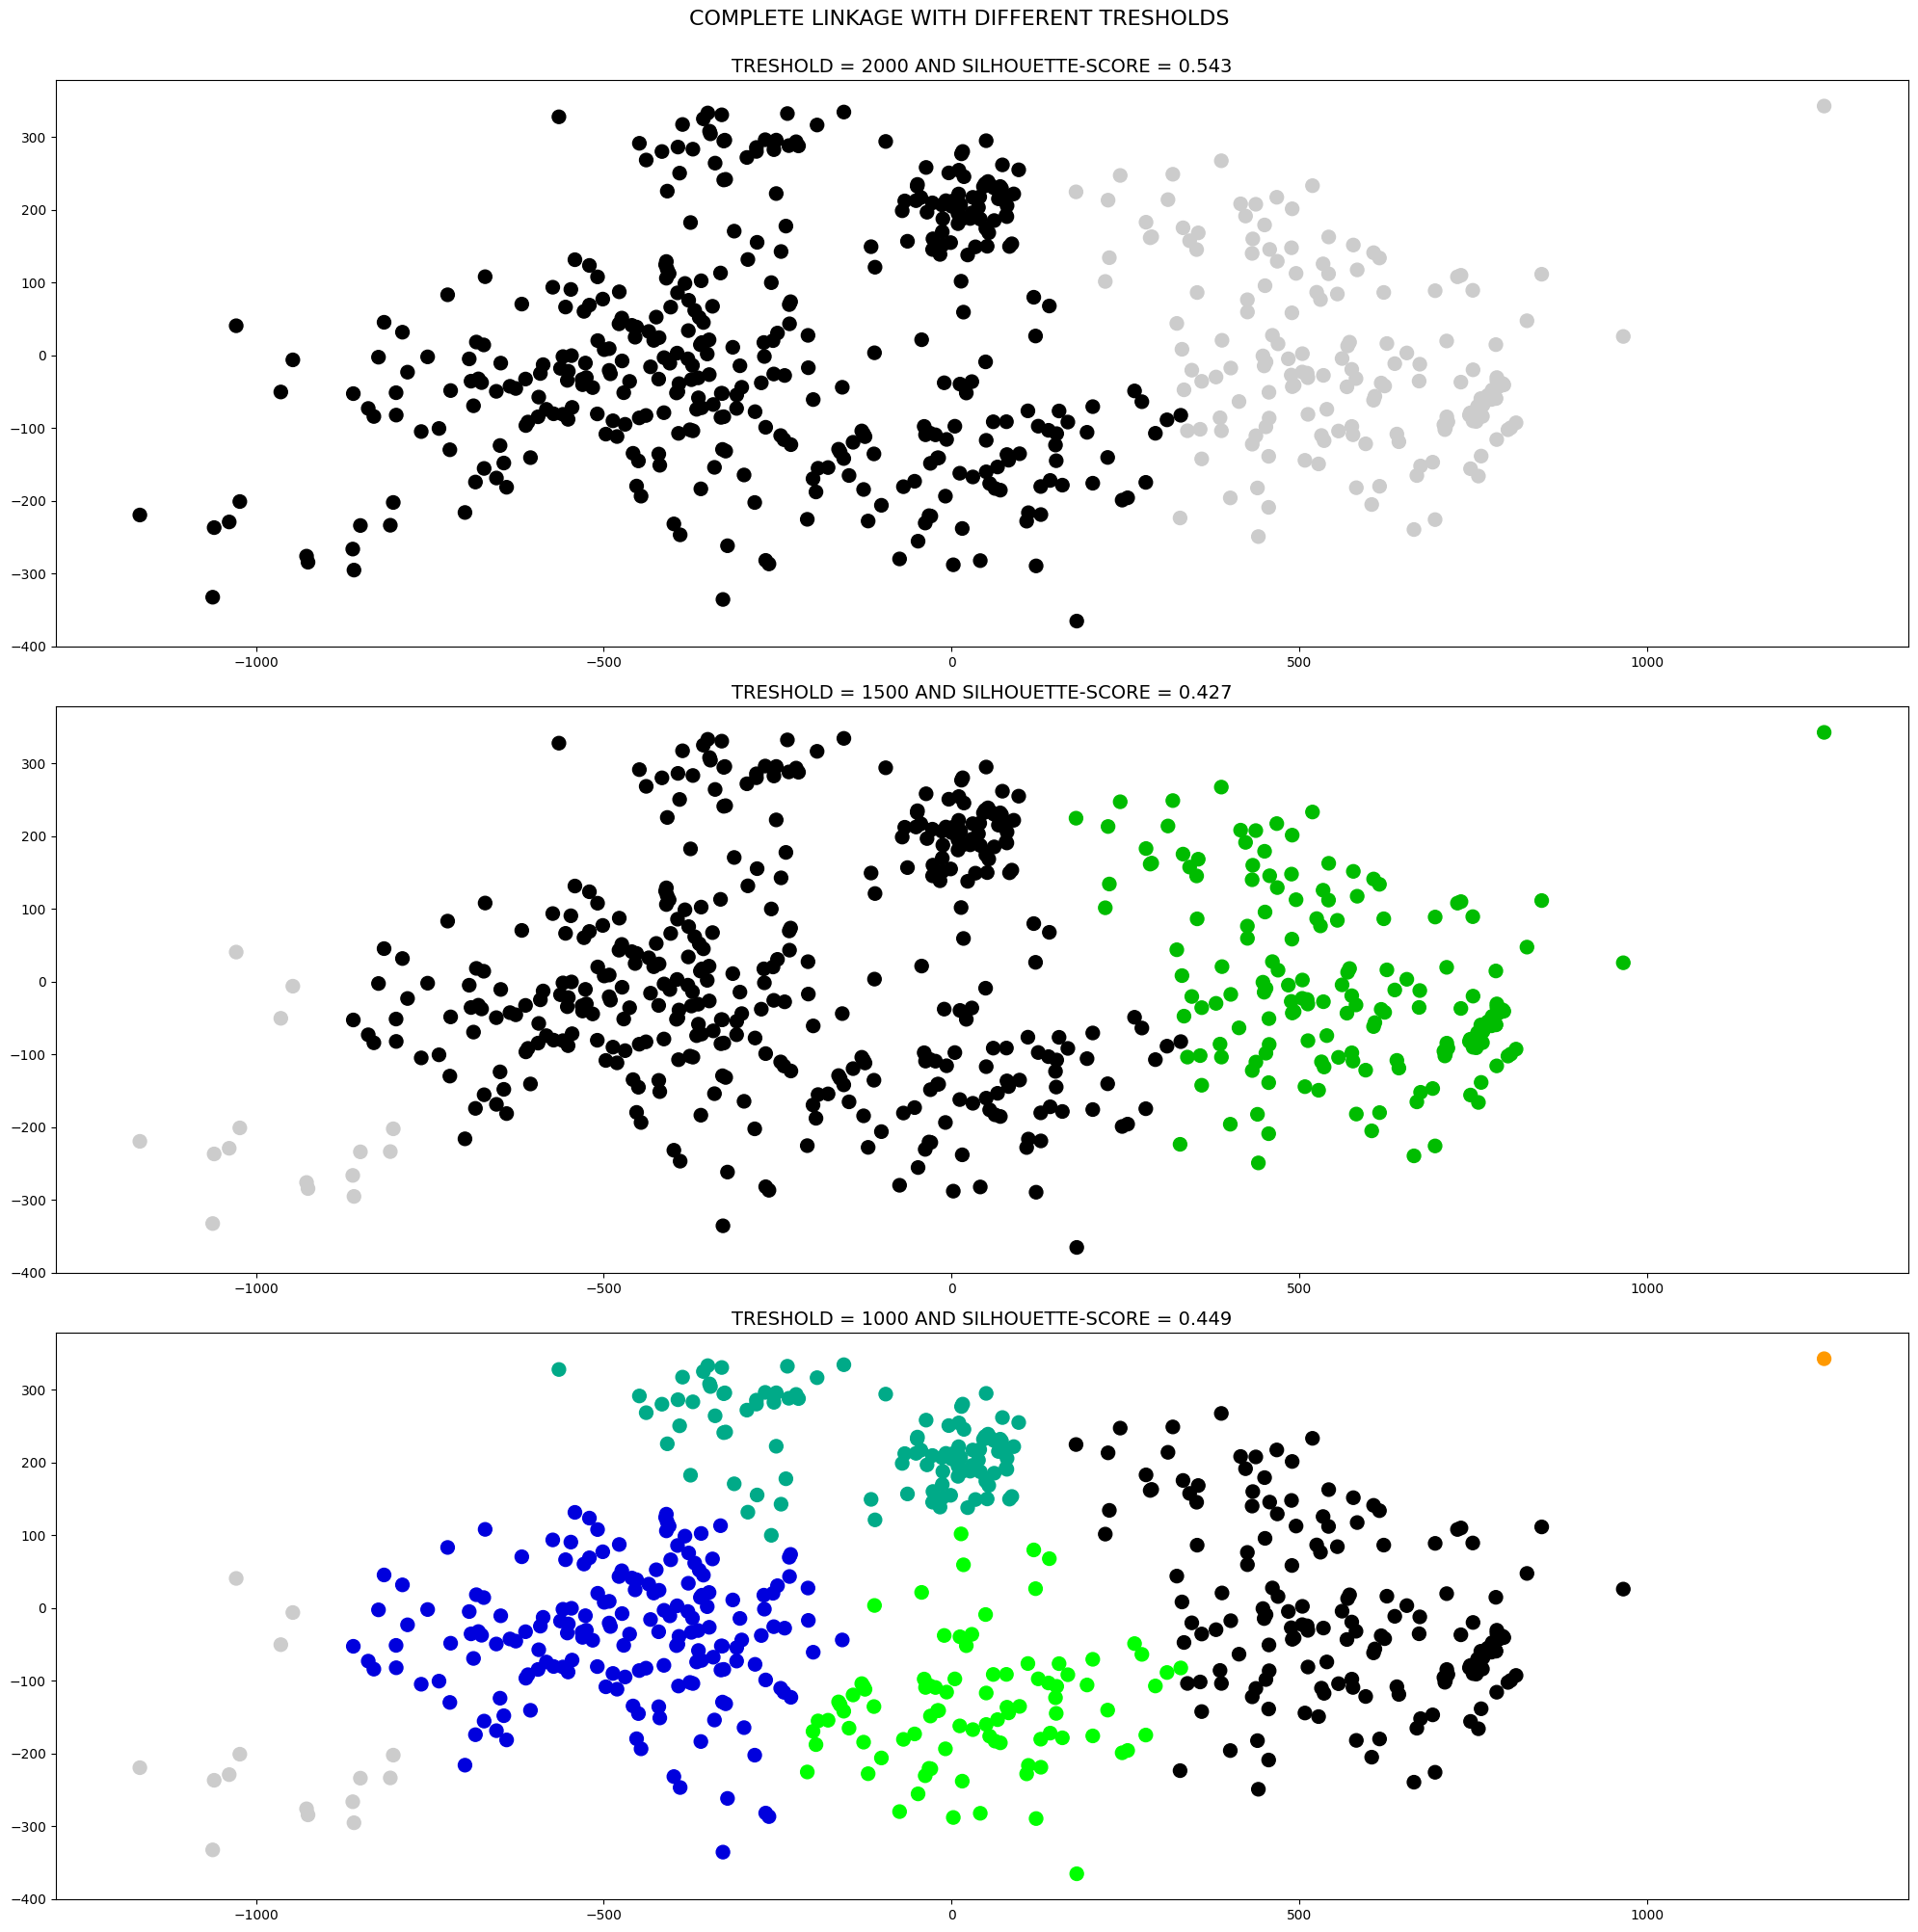

In [18]:
tresholds = [2000, 1500, 1000]

plt.figure(figsize=(20, 20))

# Clustering with AgglomerativeClustering
for i in range(1, 4):
    plt.subplot(3, 1, i)
    clustering = AgglomerativeClustering(n_clusters=None, linkage='complete', metric='euclidean', distance_threshold=tresholds[i-1])
    clusterPred = clustering.fit_predict(reduced_data)

    plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=clusterPred, cmap=plt.get_cmap('nipy_spectral'), s=100)
    score = silhouette_score(reduced_data, clusterPred)
    plt.title(f"TRESHOLD = {tresholds[i-1]} AND SILHOUETTE-SCORE = {score:.3f}", fontsize=14)


plt.suptitle("COMPLETE LINKAGE WITH DIFFERENT TRESHOLDS", fontsize=16, y=1)    # Main title
plt.tight_layout()

At **threshold = 2000**, the dataset naturally splits into two well-defined clusters (black and gray). The silhouette score of **0.543** confirms a solid separation between groups.  

Lowering the threshold to **1500** increases granularity, yielding three clusters (black, green and gray). Here, the black cluster partially splits, revealing itself as the least cohesive group. However, this comes at the cost of cluster quality: the silhouette score drops to **0.427**, the lowest across all scenarios.  

At **threshold = 1000**, the structure becomes more intriguing: six clusters emerge, yet the silhouette score rises again to **0.449**. This suggests that adding clusters at this stage provides meaningful insights without overly reducing quality. Notably, an isolated point appears, indicating that the algorithm can also detect anomalies, in line with results from the first hierarchical clustering.

In [19]:
risultati[risultati['Metrica di distanza']=='correlation'].sort_values(by='Score', ascending=False)

,Metodo,Metrica di distanza,Numero di cluster,Score
50,average,correlation,2,0.469584
52,average,correlation,4,0.366586
21,complete,correlation,3,0.329429
53,average,correlation,5,0.288886
51,average,correlation,3,0.274657
20,complete,correlation,2,0.212740
54,average,correlation,6,0.208645
22,complete,correlation,4,0.195305
81,single,correlation,3,0.190053
82,single,correlation,4,0.173886


In [20]:
reversedDf = dfSenzaCategoria.T
reversedDf

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
palmitic,1075,1088,911,966,1051,911,922,1100,1082,1037,...,1090,1150,1110,1010,1070,1280,1060,1010,990,960
palmitoleic,75,73,54,57,67,49,66,61,60,55,...,80,90,90,110,100,110,100,90,120,80
stearic,226,224,246,240,259,268,264,235,239,213,...,240,250,230,210,220,290,270,210,250,240
oleic,7823,7709,8113,7952,7771,7924,7990,7728,7745,7944,...,7820,7720,7810,7720,7730,7490,7740,7720,7750,7950
linoleic,672,781,549,619,672,678,618,734,709,633,...,760,810,750,950,870,790,810,970,870,740
eicosanoic,36,31,31,50,50,51,49,39,46,26,...,10,0,0,0,10,10,10,0,10,10
linolenic,60,61,63,78,80,70,56,64,83,52,...,0,10,10,0,10,10,10,0,10,20


Text(0, 0.5, 'Distance')

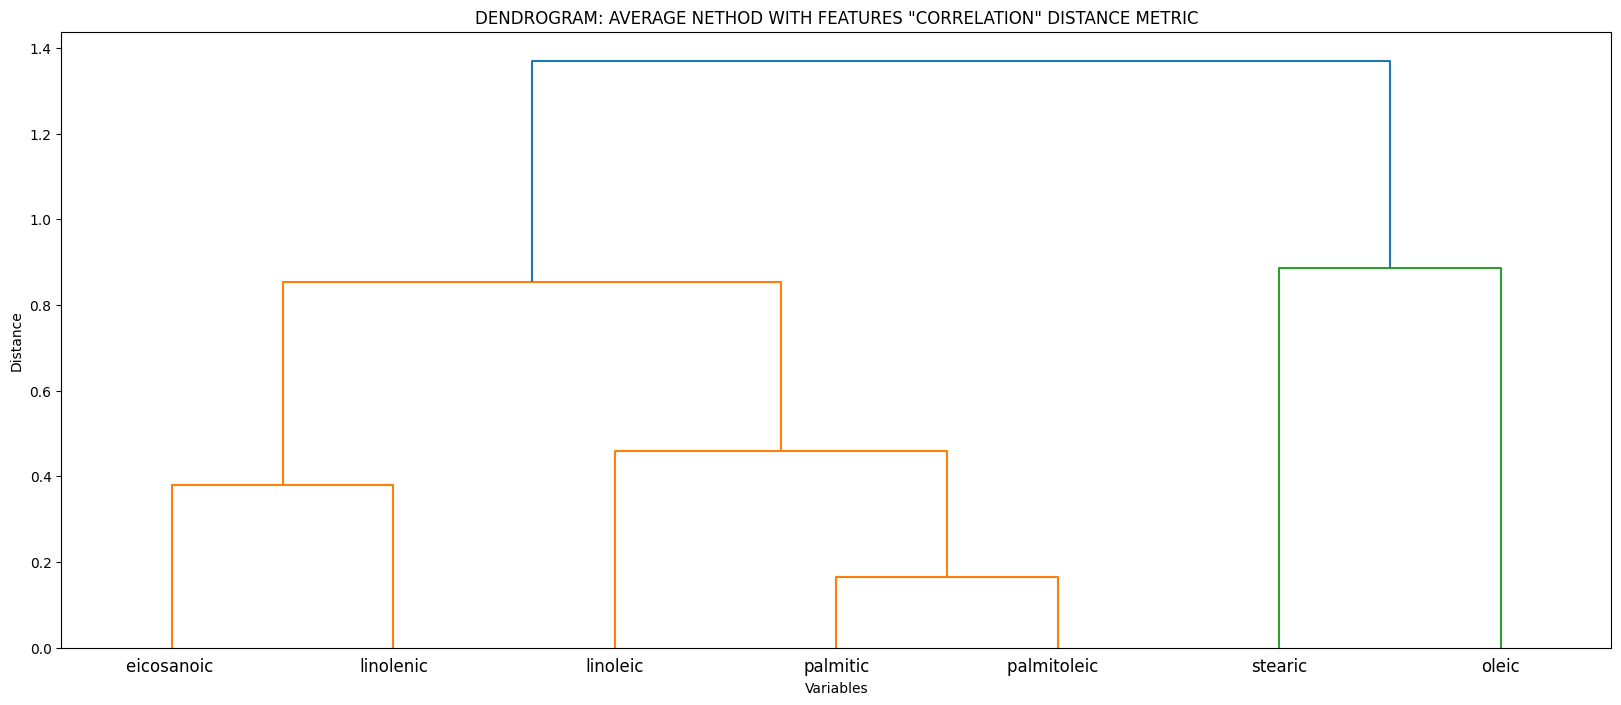

In [21]:
# Linkage matrix calculation
linkage_matrix = linkage(reversedDf, method='average', metric='correlation')

# Dendrogram creation
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix,
           labels=reversedDf.index  # Show the variables name in the dendrogram
           )
plt.title('DENDROGRAM: AVERAGE NETHOD WITH FEATURES "CORRELATION" DISTANCE METRIC')
plt.xlabel("Variables")
plt.ylabel("Distance")

This dendrogram was built using the **average linkage method** with a correlation-based distance metric, clustering **variables instead of observations**. This approach highlights the similarity of their correlation patterns.

The plot reveals **two main macro-clusters**:  
- One formed by *stearic* and *oleic acids*  
- Another grouping all remaining variables  

The large distance between these clusters indicates very low correlation, suggesting distinct underlying chemical dynamics.  

Within the larger cluster, further structure emerges:  
- *Palmitic* and *palmitoleic acids* are almost identical, showing extremely high correlation  
- *Eicosanoic* and *linolenic acids* also cluster closely, though slightly less strongly  
- *Linoleic acid* acts as a **bridge variable**, moderately correlated with previous two subgroups but more closely tied to the eicosanoic–linolenic pair  

Finally, the last two variables form a smaller, distinct group. Their moderate correlation sets them apart, suggesting they share **peculiar chemical behaviors** not observed in the rest of the dataset.

In [22]:
# Clustering with AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None, linkage='average', metric='correlation', distance_threshold=0.4)
clusterPred = clustering.fit_predict(reversedDf)

In [23]:
silhouette_score(reversedDf, clusterPred)

0.007845943959271613

In [24]:
# Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(dfSenzaCategoria)

In [25]:
linkage_matrixSamples = linkage(reduced_data, method='average', metric='minkowski')
foglieOsservazioni = dendrogram(linkage_matrixSamples,
                    no_plot=True)    # Do not plot the dendrogram

linkage_matrixFeatures = linkage(reversedDf, method='average', metric='correlation')
foglieVariabili = dendrogram(linkage_matrixFeatures, no_plot=True, labels=reversedDf.index)

print("Leaves of the dendrogram of observations:", foglieOsservazioni['leaves'])
print('Leaves of the dendrogram of variables:', foglieVariabili['leaves'])

Leaves of the dendrogram of observations: [62, 65, 49, 63, 72, 70, 27, 39, 120, 71, 68, 55, 76, 82, 32, 64, 78, 41, 29, 268, 30, 52, 272, 48, 17, 210, 261, 35, 290, 80, 282, 291, 36, 229, 54, 257, 502, 44, 285, 46, 73, 53, 74, 25, 66, 274, 33, 51, 34, 37, 57, 45, 75, 38, 40, 79, 523, 530, 526, 524, 536, 543, 546, 551, 539, 525, 532, 542, 547, 550, 552, 393, 411, 297, 269, 544, 390, 326, 328, 394, 406, 391, 400, 348, 397, 346, 325, 345, 330, 354, 368, 357, 331, 358, 356, 363, 399, 349, 340, 369, 333, 355, 405, 347, 388, 408, 396, 332, 403, 323, 329, 352, 361, 364, 344, 351, 385, 386, 327, 350, 324, 342, 367, 359, 362, 353, 360, 387, 341, 401, 365, 366, 392, 395, 402, 398, 404, 407, 211, 389, 343, 522, 187, 215, 308, 88, 248, 311, 201, 159, 172, 254, 300, 256, 310, 175, 319, 198, 158, 176, 157, 320, 193, 162, 204, 92, 139, 153, 166, 241, 207, 154, 87, 167, 194, 245, 250, 203, 197, 199, 316, 317, 299, 312, 318, 258, 314, 305, 313, 321, 298, 306, 372, 246, 371, 118, 130, 127, 123, 125, 337

Text(0.5, 1.0, 'MATRIX OF DATA SORTED BY THE ORDER IN THE PREVIOUS DENDROGRAM')

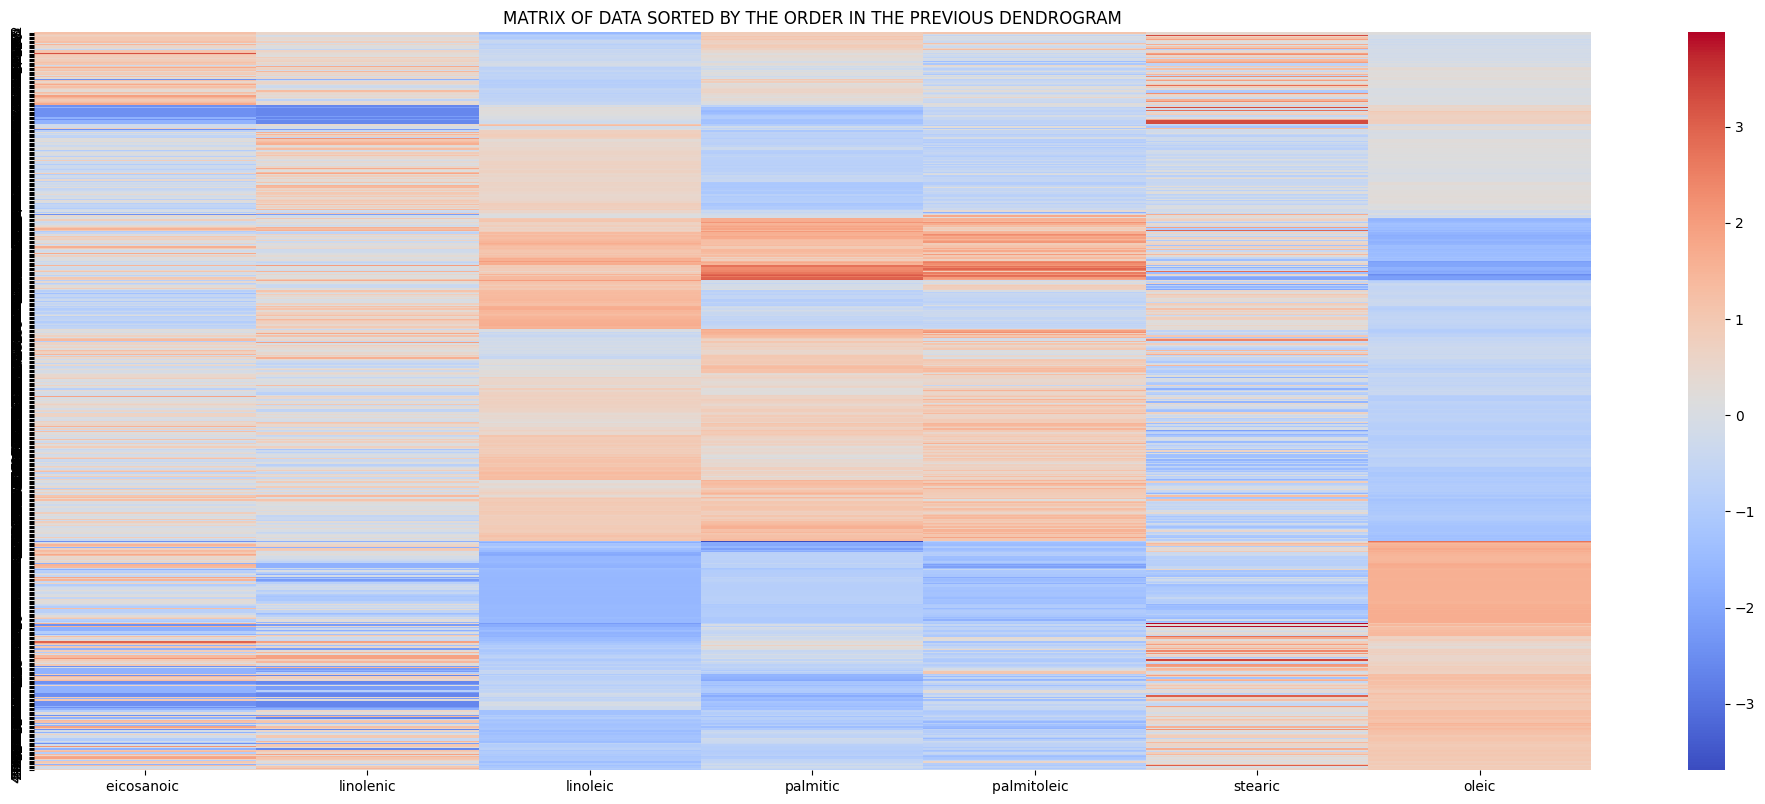

In [26]:
X_ordered = X_std[foglieOsservazioni['leaves'], :][:, foglieVariabili['leaves']]

# Ordered matrix visualization
plt.figure(figsize=(20, 8))

sns.heatmap(X_ordered, cbar=True, cmap='coolwarm',
            xticklabels=reversedDf.index[foglieVariabili['leaves']],    # Show the variables name according to the previous dendrogram of variables.
            yticklabels=foglieOsservazioni['leaves'])   # I order the arrangement of the samples according to the previous dendrogram of the samples.
plt.yticks(rotation=90)
plt.tight_layout()
plt.title("MATRIX OF DATA SORTED BY THE ORDER IN THE PREVIOUS DENDROGRAM")

This heatmap displays a matrix of standardized values, where **rows represent samples** and **columns correspond to fatty acids**. Values are color-coded: **blue = below average**, **red = above average**. Samples and variables are hierarchically ordered, as shown by the dendrograms, which help highlight clusters of similar patterns.  

Some fatty acids form clear homogeneous blocks (e.g., **palmitoleic** and **oleic**), while others (e.g., **eicosanoic** and **linolenic**) show smoother gradients, suggesting subgroups of samples with similar behaviors. By contrast, certain acids like **stearic** and **oleic** reveal weaker correlations, standing apart from the rest.  

Notably, **linoleic acid** acts as a “bridge” between variable groups: low in early samples, rising to high concentrations in the middle, and then dropping again towards the end. A comparable trend can also be observed for **palmitoleic** and **palmitic acids**.  

Overall, the heatmap confirms the presence of **distinct clusters** and highlights meaningful variable groupings that reflect underlying biochemical or geographical patterns.

Text(0.5, 1.0, 'CLUSTERING WITH DBSCAN')

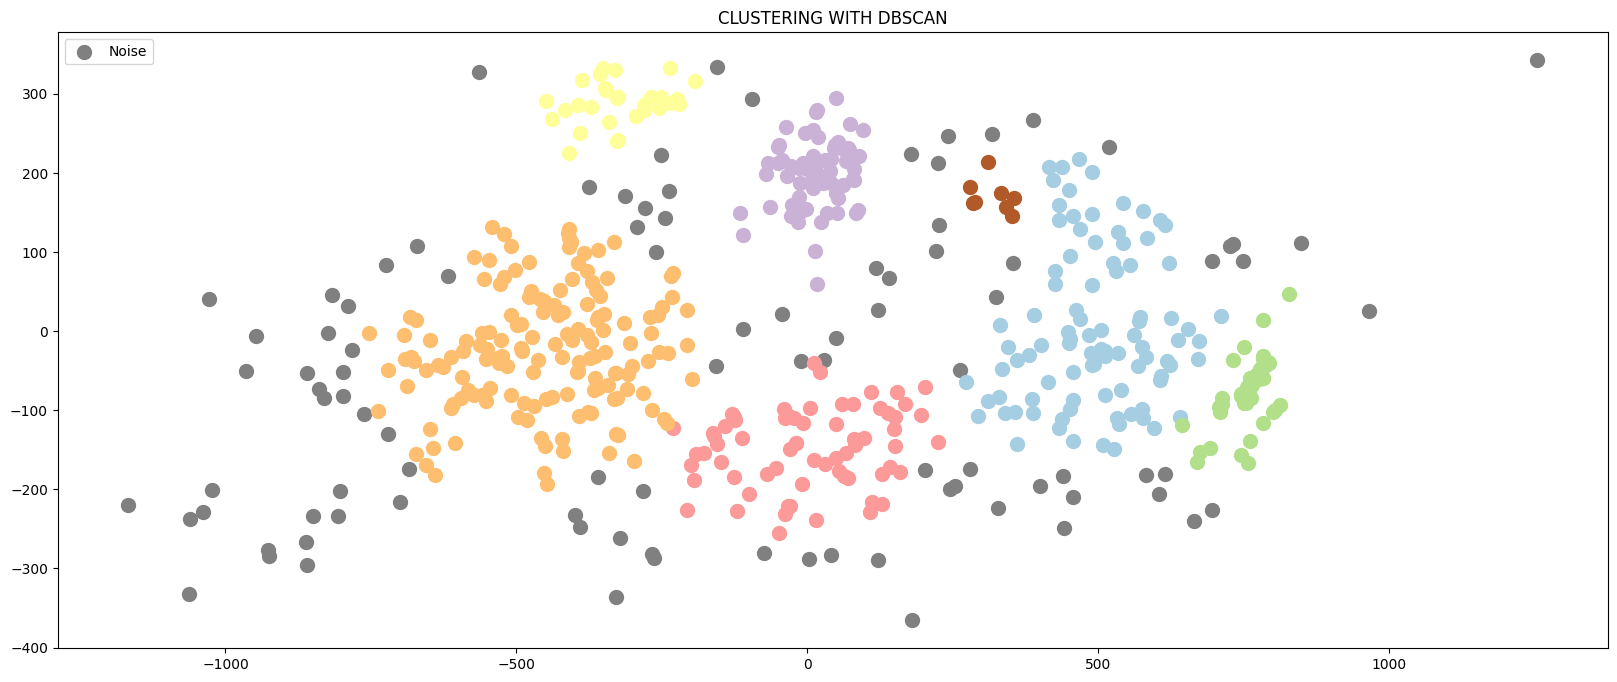

In [27]:
# DBSCAN
db = DBSCAN(eps=60, min_samples=8)
labels = db.fit_predict(reduced_data)

# Plot creation
plt.figure(figsize=(20, 8))

# Color map for the clusters
colors = cm.Paired(np.linspace(0, 1, len(np.unique(labels)) - 1))  # I exclude -1, the noise index according to DBSCAN

# Plot the points, separating clusters from noise
for cluster_id in np.unique(labels):
    if cluster_id == -1:
        # Noise points colored in gray
        plt.scatter(reduced_data[labels == cluster_id].iloc[:, 0], reduced_data[labels == cluster_id].iloc[:, 1], color='gray', label='Noise', s=100)
    else:
        # Points in clusters
        plt.scatter(reduced_data[labels == cluster_id].iloc[:, 0], reduced_data[labels == cluster_id].iloc[:, 1], color=colors[cluster_id], s=100)

plt.legend()
plt.title('CLUSTERING WITH DBSCAN')

Given the high data density, I applied the **DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm**, which is a clustering algorithm built to group points based on density. It is especially useful when clusters have arbitrary shapes or when there are outliers (isolated or noisy points).

Two hyperparameters play a key role:  
- **ε (epsilon):** defines the neighborhood radius and strongly influences the clustering outcome.  
  - Too small → too many clusters or none at all  
  - Too large → distinct clusters may merge into one less informative group  
- **MinPts (minimum points):** determines the minimum number of neighbors required to form a dense cluster.  
  - Higher values help filter out very small or irrelevant clusters  

In practice, **ε deserves more attention** since it directly sets the scale of local density, while MinPts fine-tunes how strict the algorithm is in recognizing a cluster.

In [28]:
silhouette_score(reduced_data, labels)

0.31239510591685465

Text(0, 0.5, 'Inertia')

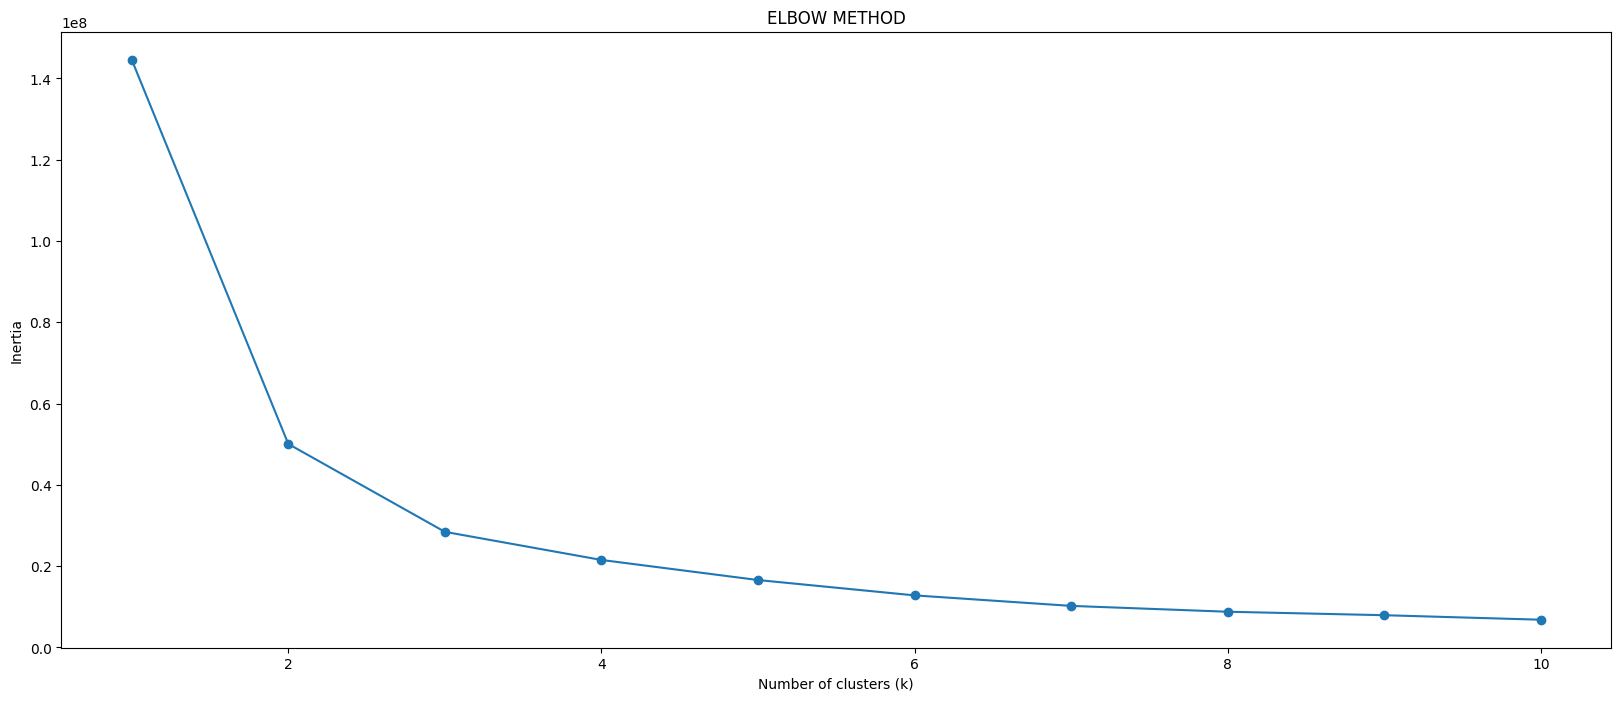

In [29]:
# List to store inertia for each k
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)

# Inertia plot
plt.figure(figsize=(20, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("ELBOW METHOD")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

This plot shows the **elbow method**, used to determine the optimal number of clusters in K-Means.  
On the x-axis we have the number of clusters, while the y-axis reports the **inertia**, which measures how tightly points are grouped around their cluster centroid. Lower values indicate more compact clusters.  

At first, inertia reduces rapidly, then the rate of decrease slows down. The point where the curve bends, the “elbow”, marks the balance between model simplicity and cluster compactness.  

In this case, the elbow appears at **k = 3**, suggesting three clusters as a reasonable choice.

**K-MEANS CLUSTERING**

K-means is a widely used **unsupervised clustering algorithm** in machine learning and data mining. Its main goal is to **group similar data points into clusters**, so that points within the same cluster are more alike than points in different clusters.  

**How it works:**  
1. Decide the number of clusters, **K**.  
2. Initialize K centroids randomly in the data space.  
3. Assign each data point to the nearest centroid.  
4. Update each centroid as the mean of its assigned points.  
5. Repeat steps 3-4 until centroids stabilize (convergence).  

**Key features:**  
- Uses **Euclidean distance** by default.  
- Fast and simple, but sensitive to outliers and random initialization.  
- Choosing K is critical; methods like the **elbow method** help find an optimal number.

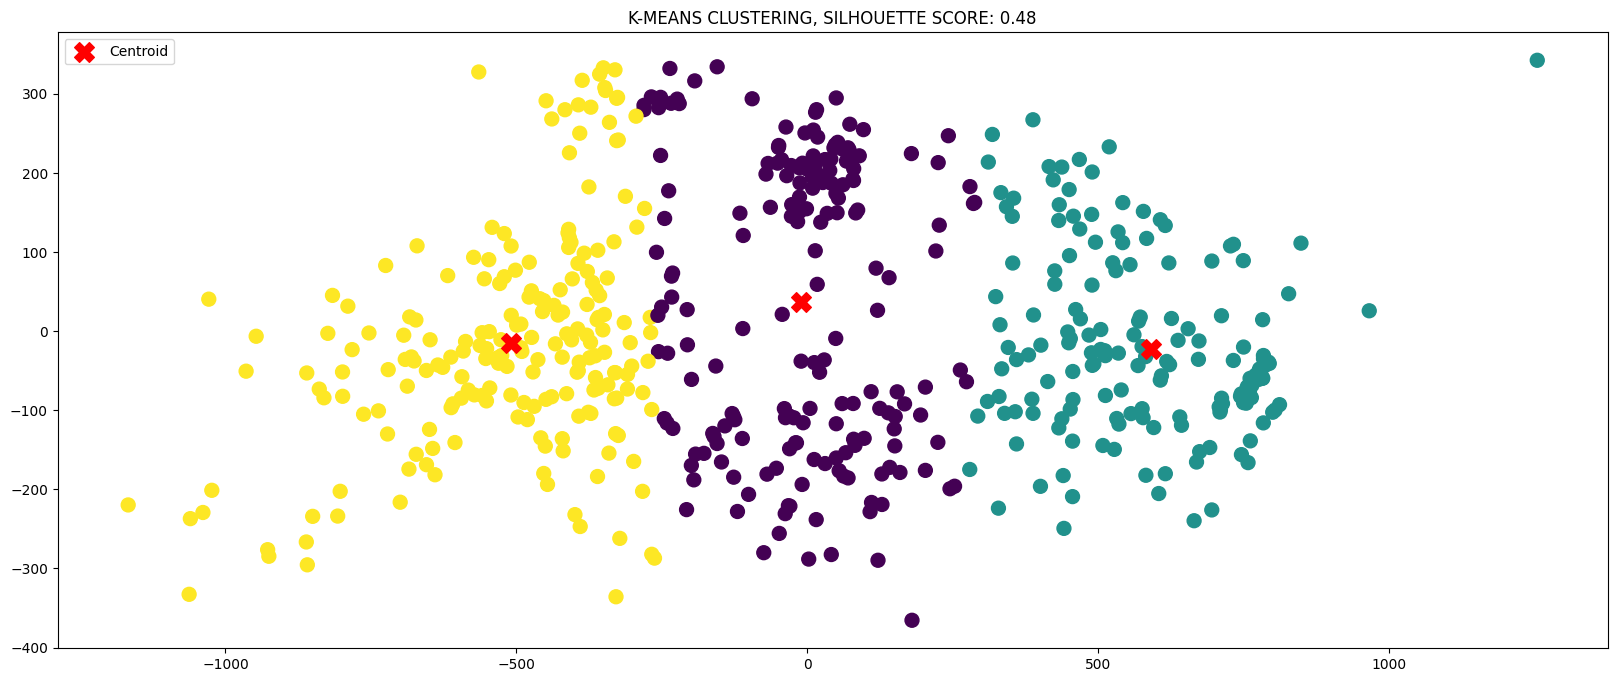

In [30]:
# Initialize the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Model training
kmeans.fit(reduced_data)

# Getting the cluster centroids
centroids = kmeans.cluster_centers_

# Getting the clusters' labels for each point
labels = kmeans.labels_

# Plot the data and centroids
plt.figure(figsize=(20, 8))
plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroid')  # Centroidi in rosso
plt.title(f"K-MEANS CLUSTERING, SILHOUETTE SCORE: {silhouette_score(reduced_data, labels):.2f}")
plt.legend()

The points are grouped into three clusters, each highlighted with a different color: yellow, purple and aqua green. Centroids are marked with red crosses.  

A score of 0.48 indicates that the clusters are moderately distinct but not completely separated. Some overlap is observed between the yellow and purple clusters, suggesting that points near their boundaries may be ambiguously classified.  

Specifically, the yellow cluster mainly contains points from category 3, while the purple cluster includes mostly points from categories 2, 4, 5 and 6. Ambiguity arises particularly for category 6, whose points are split between the left and central clusters. Some points from different clusters also belong to the same category, especially near the boundaries.  

The rightmost cluster, containing the remaining categories, appears well-defined and correctly assigned.

**Comparing Hierarchical Clustering and K-means**

Hierarchical clustering and K-means represent two distinct approaches to grouping data, each with its own strengths.

**Hierarchical Clustering**  
This method provides a multi-level, stratified view of the data, allowing exploration at different granularities. Among the three hierarchical representations, the one corresponding to an intermediate threshold resembles K-means behavior, though cluster quality differs.  

Key observations:  
- Silhouette score at the intermediate threshold is lower than K-means, indicating slightly lower overall cluster quality.  
- Data divides into three main clusters, with a single point flagged as a potential outlier.  
- Category 6 is better preserved compared to K-means, which splits it erroneously.

**K-means Clustering**  
K-means partitions data into a fixed number of clusters ($k$), with centroids shown in red. Its main limitation is the need to specify $k$ in advance.  

Key observations:  
- Clusters are more uniform in density compared to hierarchical clustering.  
- A distant point is confirmed as an outlier; the cluster centroid remains near the center despite this extreme value.

**Conclusion**  
Hierarchical clustering is ideal for exploratory analysis requiring a multi-level view of the dataset, while K-means is preferable when the expected number of clusters is known. 

After testing several $k$ values, a configuration was found that best approximates the original distribution of points.

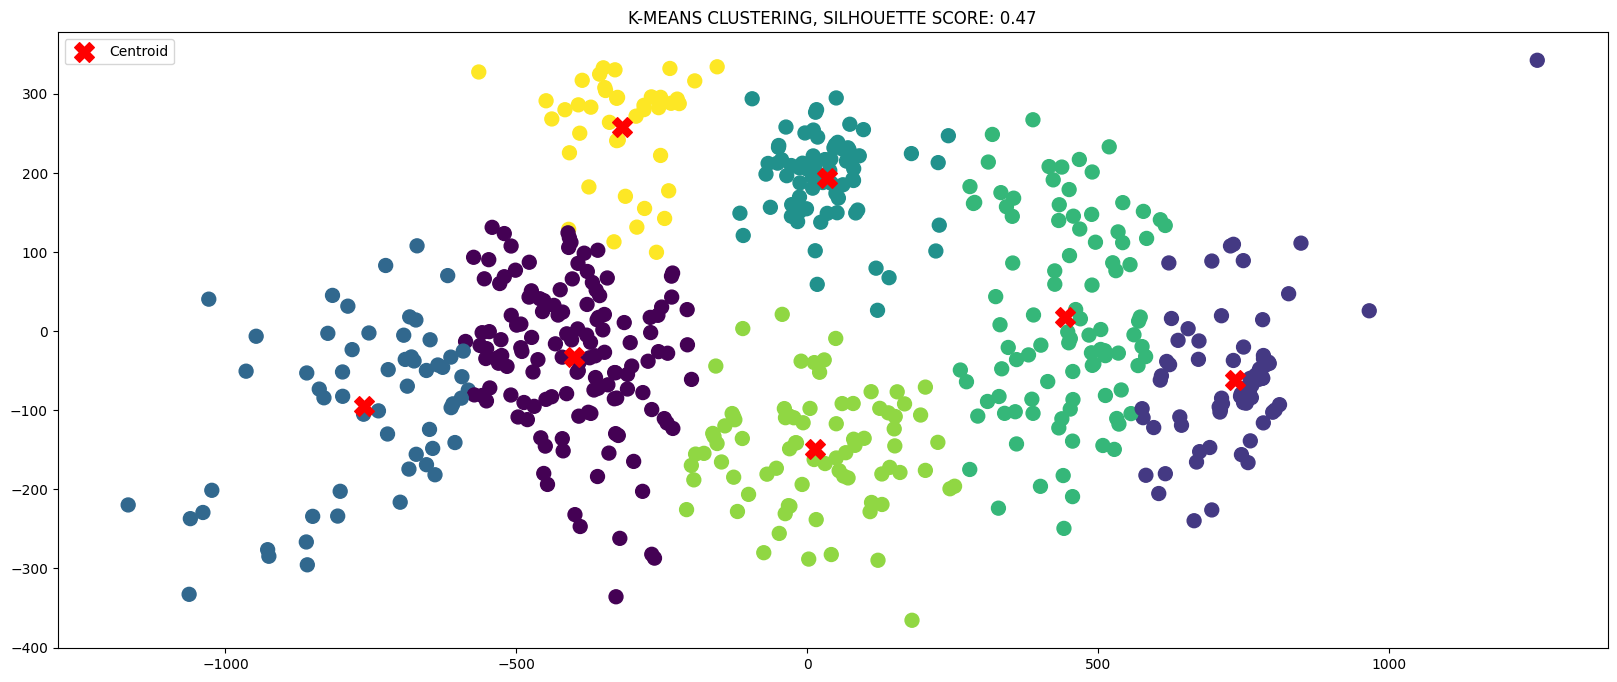

In [31]:
kmeans = KMeans(n_clusters=7, random_state=42)

kmeans.fit(reduced_data)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_

plt.figure(figsize=(20, 8))
plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroid')  # Centroidi in rosso
plt.title(f"K-MEANS CLUSTERING, SILHOUETTE SCORE: {silhouette_score(reduced_data, labels):.2f}")
plt.legend()

Here we present a further clustering attempt using a different number of clusters. Increasing to 7 clusters did not significantly improve clustering quality, as the silhouette score remains similar to the previous attempt.  

However, the resulting division aligns more closely with the patterns observed in the initial score plot. The main difference compared to the original 2D plot appears to involve category 3, whose points are split into two separate groups.  

Despite some overlap between observations, the overall cluster organization remains meaningful, confirming that the general structure of the data is well captured even if the silhouette score does not improve significantly.